Challenge: Pollution and Mobility - Strategies to reduce the environmental and health impacts

Outcome:
Create a model that allows redistributing work periods to obtain a more equitable hourly distribution of the polluting gases emitted.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
!git clone --recursive https://github.com/SowmyaMadala/WDL-Stage4.git

Cloning into 'WDL-Stage4'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 62 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (62/62), done.


In [3]:
#Let's check the data dictionary to have a better understanding on the dataset 
data_dict=pd.read_excel('/content/WDL-Stage4/Data/Pollution_and_Mobility/Dictionary_Parish_Hourly_Traffic.xlsx')
data_dict.head()

,Parish Hourly Traffic Dataset,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Column Name,Description,Type,Example
1,Dicofre,Unique Identifier of Parish,String,111002
2,Hour,Hour,integer,1
3,Hourly Avarege Traffic,County of Origin,real,25210


In [4]:
#Mobility data
mobility_data=pd.read_csv('/content/WDL-Stage4/Data/Pollution_and_Mobility/Hourly Avarege Traffic_AMP_AML.txt',sep='|')
mobility_data.head()
#Dicofre is the unique idnetifier of parish

,Dicofre,HOUR,Hourly Average Traffic
0,10402,8,220.821534
1,10402,9,220.821534
2,10402,13,241.969685
3,10402,14,263.117835
4,10402,15,263.117835


In [5]:
mobility_data.describe()
#Count of all the attributes is same 
#There are no null values

,Dicofre,HOUR,Hourly Average Traffic
count,6290.000000,6290.000000,6290.000000
mean,106997.904928,12.060572,546.471698
std,45590.583591,6.749239,959.268254
min,10402.000000,0.000000,0.075106
25%,110660.000000,7.000000,51.570875
50%,130416.000000,12.000000,171.395133
75%,131614.000000,18.000000,578.851738
max,151210.000000,23.000000,12404.770043


In [6]:
#Let's check if the data is available for all the hours
print(len(set(mobility_data['HOUR'])))
print(set(mobility_data['HOUR']))
#The data is available for all 24 hours 

24
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


In [7]:
#Check if the data is available for every hour for all the unique identifiers of parish
x=mobility_data.groupby('HOUR')
x.describe()

Dicofre                 ... Hourly Average Traffic              
       count           mean  ...                    75%           max
HOUR                         ...                                     
0      251.0  111063.107570  ...             288.336212   2633.884479
1      249.0  110896.598394  ...             180.680632   2574.753081
2      212.0  115741.047170  ...             144.279702   2375.506222
3      195.0  111607.312821  ...             108.807184    736.267088
4      166.0  115210.795181  ...             127.335236   1328.422530
5      202.0  109436.826733  ...             172.426900   2388.360307
6      232.0  111552.616379  ...             415.273433   5747.389120
7      267.0  106154.397004  ...            1168.115188   5499.541826
8      283.0  105045.190813  ...            1303.096675  12404.770043
9      284.0  105141.855634  ...            1058.500593   6949.762576
10     289.0  103508.217993  ...             659.219430   4649.078744
11     286.0  104479.513986  ...             641.327479   4430.037227
12     285.0  104809.540351  ...             895.533455   4422.839328
13     286.0  104479.444056  ...             883.301055   5759.309320
14     286.0  104479.444056  ...             832.889726   6463.241755
15     282.0  105808.390071  ...             816.132065   5936.647569
16     288.0  103831.465278  ...             848.376087   6798.602130
17     284.0  105147.151408  ...            1278.378441   7297.025024
18     286.0  104484.699301  ...            1478.020992  11744.092841
19     286.0  104063.010490  ...             983.437302   6096.775536
20     284.0  105136.647887  ...             655.980864   4495.551183
21     274.0  107260.496350  ...             410.786610   2603.499559
22     271.0  108779.778598  ...             346.588063   2070.740141
23     262.0  109847.778626  ...             276.480337   1194.097338

[24 rows x 16 columns]

It is observed that we don't have every hour traffic analysis for all the Dicofre.Because from the above decribe of dataframe formed by grouping with hour, we got distint count values for each hour.

In [8]:
count=mobility_data['HOUR'].value_counts().sort_index()

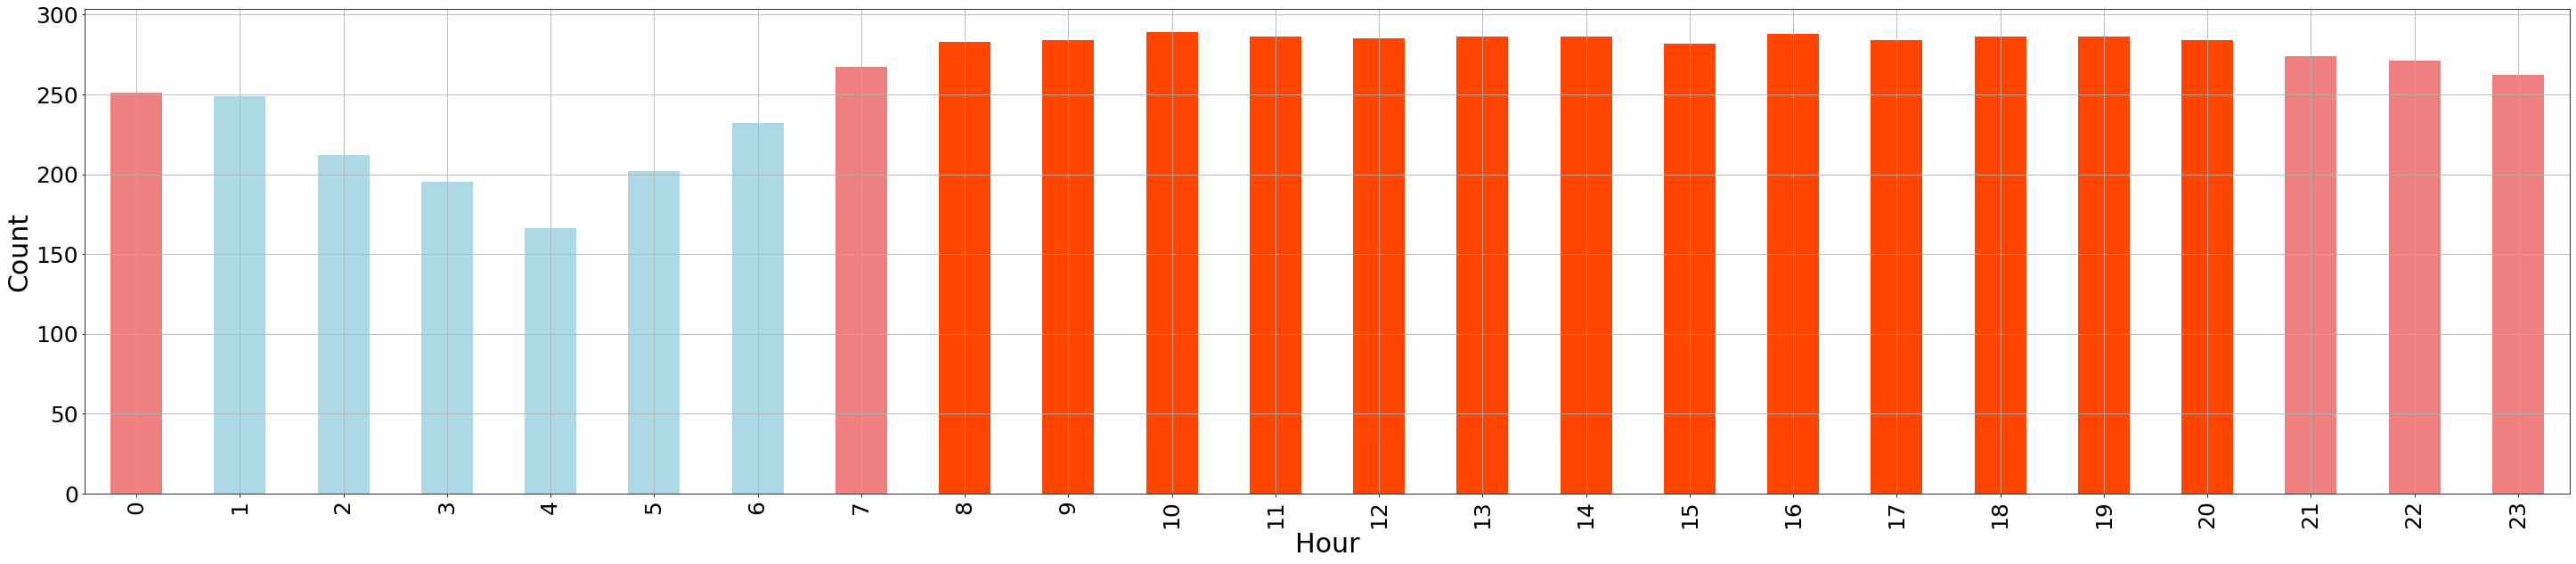

In [9]:
col = []
for val in count:
    if val < 250:
        col.append('lightblue')
    elif val > 275:
        col.append('orangered')
    else:
        col.append('lightcoral')
plt.xlabel('Hour',fontsize=30)
plt.ylabel('Count',fontsize=30)
count.plot(kind='bar',figsize=(50, 10),grid=True,fontsize=25,color=col)

The data avaliable for 4th hour is the least.The data is mostly avilable for 8-20 hours.
This might be because they are the most active hours in a day

1. Creat a dataset with parishes containing actual working hours data #first 24
2. Model for distributing working hours to reduce pollution at same time
3. If possible check for weather api
4. Checking if parishes related data can help

In [10]:
#Parishes may also effect the average traffic present
#So let's check how the values sre distributed
x=mobility_data['Dicofre'].value_counts()==24    #To check if a particular Parish has all hours traffic data
x1=list(x[x].index)                              #List the parishes with all 24 hours average traffic data 

In [11]:
#Creating dataframe that contains the Parish with all hours data
mobility_data_24 = mobility_data[mobility_data['Dicofre'].isin(x1)]
mobility_data_24

,Dicofre,HOUR,Hourly Average Traffic
394,10916,0,23.665718
395,10916,1,25.257473
396,10916,2,18.273343
397,10916,3,17.715005
398,10916,4,18.057844
...,...,...,...
6263,151209,19,435.844379
6264,151209,20,210.676857
6265,151209,21,117.747987
6266,151209,22,109.051775


In [ ]:
#Let's compare the no.of columns present 
print("Total col's in dataframe: {0}".format(len(mobility_data)))
print("col's with all 24 hours data: {0} ".format(len(mobility_data_24)))

Total col's in dataframe: 6290
col's with all 24 hours data: 3456 


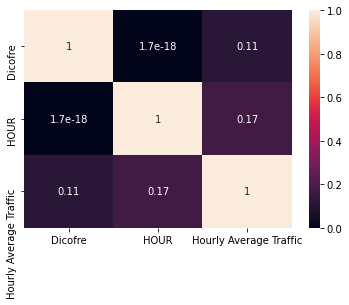

In [15]:
corrMatrix = mobility_data_24.corr()
sn.heatmap(corrMatrix,annot=True)
plt.show()

In [18]:
#Let's check single parish data
parish_data=mobility_data_24[mobility_data_24['Dicofre']==10916]
parish_data

,Dicofre,HOUR,Hourly Average Traffic
394,10916,0,23.665718
395,10916,1,25.257473
396,10916,2,18.273343
397,10916,3,17.715005
398,10916,4,18.057844
399,10916,5,37.834784
400,10916,6,21.099320
401,10916,7,385.856022
402,10916,8,204.459662
403,10916,9,186.421408


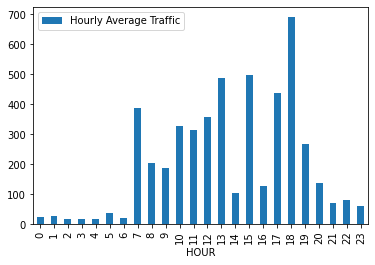

In [26]:
parish_data.plot(x='HOUR', y='Hourly Average Traffic',kind='bar')